## A Simple Model

This notebook will walk you through how to create a basic linear regression. 

I would note this model is not accurate for a number or reasons (small data set, few features, etc.), but is a good example of what you would do if there was better data. 

### 1. Import Modules and data

In [30]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
file_dir = os.path.join("..","Datasets")
df = pd.read_csv(os.path.join(file_dir,"EU_Total_Losses_80-15.csv"))

In [32]:
df.head()

,Year,clim_losses,met_losses,total_losses,water_losses
0,1980,3170.0,158.0,3414.0,86.0
1,1981,2.0,1919.0,2277.0,356.0
2,1982,7026.0,2452.0,14331.0,4853.0
3,1983,4149.0,708.0,11026.0,6169.0
4,1984,2.0,4346.0,4690.0,342.0


In [33]:
df.dtypes

Year              int64
clim_losses     float64
met_losses      float64
total_losses    float64
water_losses    float64
dtype: object

In [34]:
temps = pd.read_csv(os.path.join(file_dir,"GlobalTemps.csv"))

In [35]:
temps = temps.drop("Unnamed: 0",axis = 1)

In [36]:
temps.head()

,indic,source,unit,Year,Value
0,TD_EUR,GISTEMP,DEGC,2017,1.74
1,TD_EUR,HADCRUT4,DEGC,2017,1.73
2,TD_EUR,NOAAGLOBALTEMP,DEGC,2017,1.73
3,TD_GLB,GISTEMP,DEGC,2017,1.12
4,TD_GLB,HADCRUT4,DEGC,2017,0.99


In [37]:
temps.indic.value_counts()

TD_EUR    93
TD_GLB    93
Name: indic, dtype: int64

Let's just consider EU temps

In [38]:
eu_temp= temps[temps['indic']=='TD_EUR']

In [39]:
eu_temp['source'].value_counts()

HADCRUT4          33
NOAAGLOBALTEMP    30
GISTEMP           30
Name: source, dtype: int64

Let's only look at one measurement source for simplicity. 

In [40]:
eu_temp = eu_temp[eu_temp['source']=='HADCRUT4']

In [41]:
eu_temp.head()

,indic,source,unit,Year,Value
1,TD_EUR,HADCRUT4,DEGC,2017,1.73
7,TD_EUR,HADCRUT4,DEGC,2016,1.86
13,TD_EUR,HADCRUT4,DEGC,2015,1.88
19,TD_EUR,HADCRUT4,DEGC,2014,2.20
25,TD_EUR,HADCRUT4,DEGC,2013,1.41


In [42]:
eu_temp.dtypes

indic      object
source     object
unit       object
Year        int64
Value     float64
dtype: object

Merge our datasets on 'Year'

In [43]:
together = df.merge(eu_temp[['Year','Value']],on='Year')

In [44]:
together.head()

,Year,clim_losses,met_losses,total_losses,water_losses,Value
0,1980,3170.0,158.0,3414.0,86.0,0.10
1,1990,4185.0,20880.0,26727.0,1662.0,1.39
2,2000,2449.0,1735.0,20529.0,16345.0,1.53
3,2001,495.0,2026.0,3834.0,1313.0,1.29
4,2002,2.0,5411.0,29404.0,23991.0,1.53


Rename the 'Value' column to make it easier to understand what the data is. 

In [45]:
together = together.rename(columns = {'Value':'Deg-C'})

### 2. Look for correlations or patterns in the data

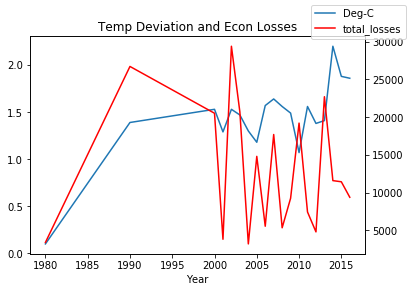

In [46]:
ax = together.plot(x = 'Year',y = 'Deg-C',legend = False)
ax2 = ax.twinx()
together.plot(x = 'Year',y = 'total_losses',ax = ax2,legend = False,color = 'r')
ax.figure.legend()
plt.title("Temp Deviation and Econ Losses")
plt.show()

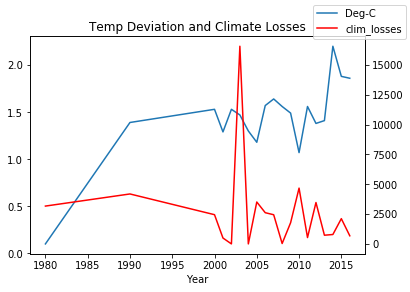

In [47]:
ax = together.plot(x = 'Year',y = 'Deg-C',legend = False)
ax2 = ax.twinx()
together.plot(x = 'Year',y = 'clim_losses',ax = ax2,legend = False,color = 'r')
ax.figure.legend()
plt.title("Temp Deviation and Climate Losses")
plt.show()

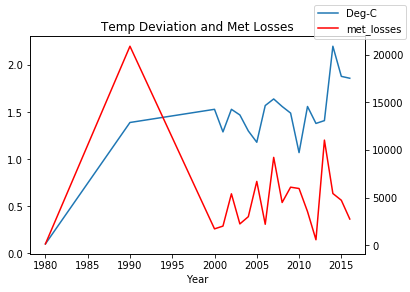

In [48]:
ax = together.plot(x = 'Year',y = 'Deg-C',legend = False)
ax2 = ax.twinx()
together.plot(x = 'Year',y = 'met_losses',ax = ax2,legend = False,color = 'r')
ax.figure.legend()
plt.title("Temp Deviation and Met Losses")
plt.show()

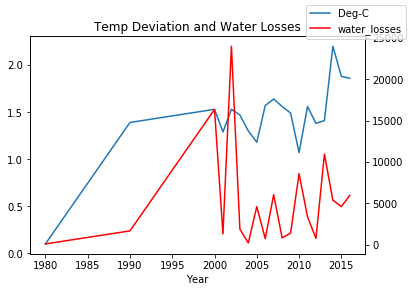

In [49]:
ax = together.plot(x = 'Year',y = 'Deg-C',legend = False)
ax2 = ax.twinx()
together.plot(x = 'Year',y = 'water_losses',ax = ax2,legend = False,color = 'r')
ax.figure.legend()
plt.title("Temp Deviation and Water Losses")
plt.show()

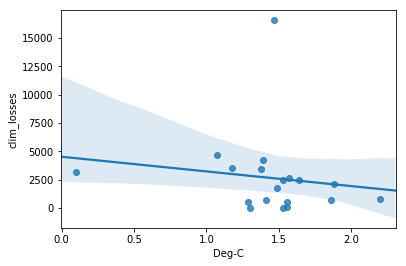

In [50]:
sns.regplot(data = together, x = 'Deg-C',y = 'clim_losses')

In [51]:
#Take out outlier...
together = together[together['clim_losses']<15000]

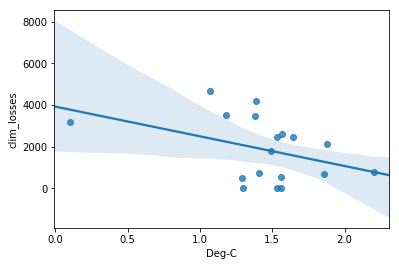

In [52]:
sns.regplot(data = together, x = 'Deg-C',y = 'clim_losses')

Often it is beneficial to take the log of certain features to better fit a linear model. Our Climate loss data is a good candidate for this as it's scale is arguable more logarithmic than linear. By transforming it we can apply a linear regression model

In [53]:
together['log_clim_losses']= together['clim_losses'].apply(np.log)

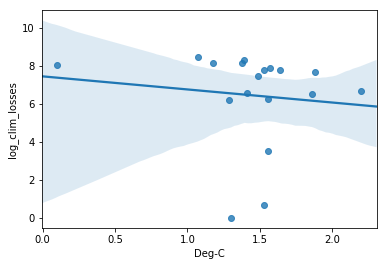

In [54]:
sns.regplot(data = together, x = 'Deg-C',y = 'log_clim_losses')

In [55]:
#More outliers appear..let's remove them
together = together[together['clim_losses']>2]

In [56]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [57]:
together.shape

(16, 7)

In [58]:
together[['Deg-C','clim_losses','log_clim_losses']]

,Deg-C,clim_losses,log_clim_losses
0,0.10,3170.0,8.061487
1,1.39,4185.0,8.339262
2,1.53,2449.0,7.803435
3,1.29,495.0,6.204558
7,1.18,3511.0,8.163656
8,1.57,2616.0,7.869402
9,1.64,2444.0,7.801391
10,1.56,34.0,3.526361
11,1.49,1775.0,7.481556
12,1.07,4674.0,8.449771


In [59]:
together = together[together['clim_losses']>2]

### Let's fit some models!

First let's try for the non-log transformed loss data


In [60]:
#We create training and test sets so we can more accurately "score" our model on test data. Again having such a small dataset
# is not going to lead to very good results...
X = together['Deg-C']
y = together['clim_losses']
X_train = X[0:9]
X_test = X[9::]
Y_train = y[0:9]
Y_test = y[9:]

In [61]:
regr = linear_model.LinearRegression()
regr.fit(X_train.values.reshape(-1,1),Y_train.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
y_pred = regr.predict(X_test.values.reshape(-1,1))

Coefficients: 
 [[-842.00764748]]
Mean squared error: 1834502.45
Variance score: 0.20


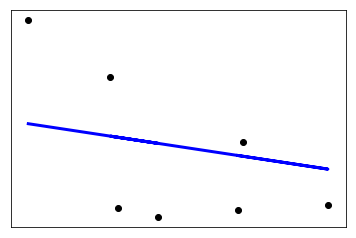

In [63]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, y_pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

That's a pretty large MSE...
20% R^2 for only 16 data points is not as bad as I expected however...

Now let's try for the log transformed loss data


In [64]:
X = together['Deg-C']
y = together['log_clim_losses']
X_train = X[0:9]
X_test = X[9::]
Y_train = y[0:9]
Y_test = y[9:]

In [65]:
regr = linear_model.LinearRegression()
regr.fit(X_train.values.reshape(-1,1),Y_train.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
y_pred = regr.predict(X_test.values.reshape(-1,1))

Coefficients: 
 [[-0.7840394]]
Mean squared error: 0.53
Variance score: 0.20


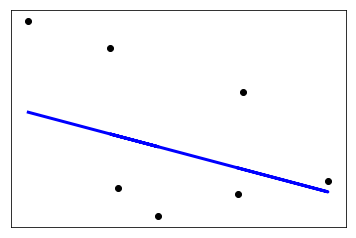

In [67]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, y_pred))

# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

MSE has significantly improved, but the R^2 remained the same. 

Overall, I would say this model doesn't intuiatively make much sense. The negative slope implies the Economic losses will decrease the more temperate deviates from average. 

There are clearly other factors at play, and having such a small sample isn't help either. 

However this is a good exercise in creating and interpreting linear models. 

See if you can do better!!